## Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнила студентка гр. 9382 Пя Сон Хва, вариант 30.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при 𝑡 → +∞.

## Основные теоретические положения

Линейная однородная система c периодическими коэффициентами - это
$$ X' = A(t)X, A(t + T) = A(t), t >= 0$$
$Ф(t)$ - фундаментальная матрица системы, то есть ее столбцы – линейно независимые решения уравнения. В матричной записи $ Ф' = A(t)Ф$. 

Если $X(t)$ - решение линейной автономной системы, то $X(t + τ)$, где $τ$ - любое число, является решением этой системы.

Матрица С, удовлетворяющая условию $$Ф(t + T) = Ф(t)C, ∀t >= 0,$$ называется основной для фундаментальной матрицы $Ф(t)$.
Спектральным радиусом матрицы А называется максимум модуля ее собственных чисел.
$$ ρ(A) = max_{0<=j<=n}|λ_j|$$

## Постановка задачи

Дано дифференциальное уравнение:
$$𝑥′′ + 𝑎(𝑝, 𝑡)𝑥 = 0, 𝑎(𝑝, 𝑡) = 𝑝 + 𝑏(𝑡), 𝑏(𝑡 + 𝑇) = 𝑏(𝑡),$$
где $𝑝$ – параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:
$$\begin{equation*}
 \begin{cases}
   𝑢′_1 = 𝑢_2,
   \\
  𝑢′_2 = −𝑎(𝑝, 𝑡)𝑢_1;
 \end{cases}
\end{equation*}$$
Здесь $$𝑢_1(𝑡) = 𝑥(𝑡), 𝑢_2(𝑡) = 𝑥′(𝑡).$$
Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной
периодической системе, а не только к системе вида (1).

## Выполнение работы

$$ln(2 + sin2t)$$
Алгоритм проходит по заданному массиву значений параметра p от 0.1 до 5 с шагом 0.05. Для каждого значения p находится значение фундаментальной матрицы, служащей для получения столбцов основной матрицы. Максимум модуля собственных чисел основной матрицы - её спектральный радиус.

Строится график зависимости по значениям спектральных радиусов, из которого с достаточной точностью можно определить точку p0, которая разделяет зоны устойчивости и неустойчивости системы.

p0 =  4.400000000000001


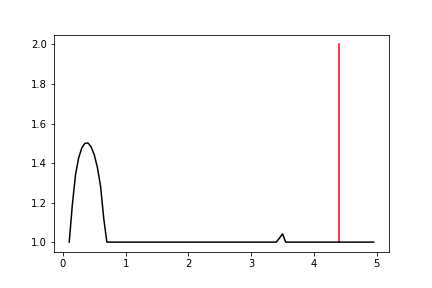

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
import numpy as np

V1 = [1, 0]
V2 = [0, 1]
p_range = np.arange(0.1, 5, 0.05)
T = math.pi
t_range = np.arange(0,T, 0.05)
spectral = []

def b(p,t):
    return p + np.log(2 + np.sin(2 * t))
    
def calc():
    for p in p_range:
        sys = lambda x, t: [x[1], -b(p, t) * x[0]]
        U1 = odeint(sys, V1, t_range)
        U2 = odeint(sys, V2, t_range)
        C = np.array([U1[-1], U2[-1]])
        spectral.append(np.max(np.abs(np.linalg.eigvals(C))))
    
    for i in range(len(spectral)):
        if spectral[-1-i] > 1:
            p0 = p_range[-i]
            break
    return p0
    
def show(p0):
    plt.plot([p0, p0], [1, 2], color="red", label="p0")
    plt.plot(p_range, spectral, color="black")
    plt.show()
    
p0 = calc()
print("p0 = ", p0)
show(p0)

## Выводы

В ходе данной лабораторной работы было изучено поведение решений системы линейных уравнений с периодическими коэффициентами при t-> inf. Была найдена p0 = 4.4 - граница между зонами устойчивости и неустойчивости.